In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [148]:
adm = pd.read_csv('/Users/dkrupnik/Documents/ga-datascience/projects/unit-projects/project-1/assets/admissions.csv')

In [127]:
tips = sns.load_dataset('tips')

In [128]:
adm.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

In [137]:
adm.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [143]:
adm.gre.median()

580.0

# Project 1 (Admissions Dataset) - David Krupnik

## Read and Evaluate the following problem statement:

*Using the cross-sectional dataset from UCLA's Logit Regression in R , determine the total amount studeints accepted in to UCLA and the extent that each students' GRE, GPA and Class Rank will affect whether they will be admitted in to University in the next academic year.

#### 1. How many people were admitted in to the university?

Answer: adm.groupby('admit')['gre'].count()

In [129]:
adm.groupby('admit')['gre'].count()

admit
0    271
1    127
Name: gre, dtype: int64

#### 2. What are the predictors/covariates?

Answer: adm.columns[1:]

In [130]:
adm.columns[1:]

Index(['gre', 'gpa', 'prestige'], dtype='object')

#### 3. What time frame is this dataset relevant for?

Answer: The timeframe for this dataset is unknown as it is a cross-sectional dataset.

#### 4. What is the hypothesis?

Answer: The top third of all students will be admitted based on their GRE, GPA and Class Rank

#### 5. What are some of the risks & assumptions of the dataset?

Risks: 
The top third of all students will be admitted based on their GRE, GPA and Class Rank

Assumptions: 
In the case of the UCLA dataset, we are assuming that all student rankings are following the same numerical ranking system of 1-4 regardless of school state or district

# Great! Now let's explore our data

*Referencing the data dictionary below, find the following metrics using the student's GRE score, GPA and Rank:*

* Mean
* Median
* Standard Deviation
* Min
* Max

Variable | Description | Type of Variable
:-| :---| :---
Admit |Was the applicant admitted (1) or not admitted (0) to the university  | categorical
GRE | The applicant's GRE score | categorical
GPA | The applicant's GPA from their previous university | categorical 
Prestige | The applicant's undergraduate class rank, with 1 being the highest and 4 as the lowest | continuous


In [133]:
adm.groupby(['admit'])['gre'].agg([np.mean, np.median, np.std, np.min, np.max]) #GRE

,mean,median,std,amin,amax
admit,,,,,
0,573.579336,580.0,116.052798,220.0,800.0
1,618.897638,620.0,108.884884,300.0,800.0


In [134]:
adm.groupby(['admit'])['gpa'].agg([np.mean, np.median, np.std, np.min, np.max]) # GPA

,mean,median,std,amin,amax
admit,,,,,
0,3.345404,3.340,0.376773,2.26,4.0
1,3.489206,3.545,0.371655,2.42,4.0


In [135]:
adm.groupby(['admit'])['prestige'].agg([np.mean, np.median, np.std, np.min, np.max]) # Prestige

,mean,median,std,amin,amax
admit,,,,,
0,2.641026,3.0,0.917198,1.0,4.0
1,2.150794,2.0,0.921455,1.0,4.0


In [ ]:
adm([])

## Now set the variables to be used in your analysis.

In [58]:
# Set the variables for applicants by rank
rank_top = adm.prestige == 4
rank_midhigh = adm.prestige == 3
rank_midlow = adm.prestige == 2
rank_low = adm.prestige == 1


In [59]:
adm.groupby(['admit'])['gre'].min() #determining the minimum GRE score for all admittents (in comp with non-admittents)

admit
0    220.0
1    300.0
Name: gre, dtype: float64

In [60]:
adm.groupby(['admit'])['gpa'].min() #determining the minimum GPA score for all admittents (in comp with non-admittents)

admit
0    2.26
1    2.42
Name: gpa, dtype: float64

In [61]:
adm.groupby(['admit'])['prestige'].min() #determining the minimum Class Rank for all admittents (in comp with non-admittents)

admit
0    1.0
1    1.0
Name: prestige, dtype: float64

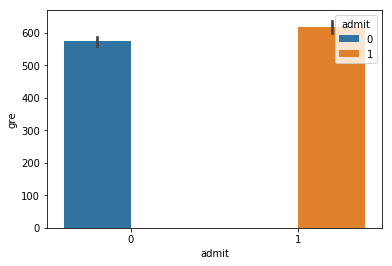

In [62]:
plt.figure()
sns.barplot('admit', 'gre', hue = 'admit', data= adm)

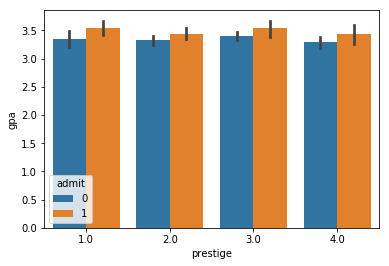

In [63]:
plt.figure()
sns.barplot('prestige', 'gpa', hue = 'admit', data= adm)

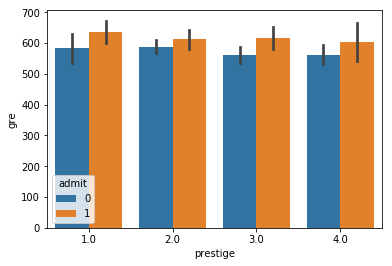

In [64]:
plt.figure()
sns.barplot('prestige', 'gre', hue = 'admit', data= adm)

In [65]:
# Set the variables for applicants by rank
rank_top = adm.prestige == 4
rank_midhigh = adm.prestige == 3
rank_midlow = adm.prestige == 2
rank_low = adm.prestige == 1

# Set the variables for admitted students and not admitted students


#### Determine how many students were accepted
Answer: adm.admit.sum() / adm.admit.count()

In [78]:
#### Determine how many students were accepted
adm.admit.sum()

127

#### Determine what percentage of students were accepted
Answer: adm.admit.sum() / adm.admit.count()

In [80]:
#### Determine percentage of students were accepted
adm.admit.sum() / adm.admit.count()

0.3175

In [120]:
def rank4_adm(admit):
    if adm.admit == 4:
        return 1
    else:
        return 0
    

In [140]:
np.correlate(adm.gpa, adm.prestige)

array([nan])

In [141]:
plt.figure()
sns.residplot('prestige', 'gre', hue = 'admit', data= adm)

TypeError: residplot() got an unexpected keyword argument 'hue'